In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

In [4]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# preprocessing the data  
# Drop the 'deck' column if it exists
if 'deck' in df.columns:
    df.drop('deck', axis=1, inplace=True)

# Impute missing values in 'age' and 'fare' columns
if 'age' in df.columns:
    df['age'].fillna(df['age'].median(), inplace=True)

if 'fare' in df.columns:
    df['fare'].fillna(df['fare'].median(), inplace=True)

# Impute missing values in 'embarked_town' and 'embarked' columns
if 'embarked_town' in df.columns:
    df['embarked_town'].fillna(df['embarked_town'].mode()[0], inplace=True)

if 'embarked' in df.columns:
    df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Encode categorical data using LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = le.fit_transform(df[col])

# Display the first few rows of the DataFrame
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [6]:
# x and y  column
X= df.drop('survived', axis=1)
y= df['survived']


In [7]:
# train test the split 
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
# model call 
model= LogisticRegression()


In [9]:
# train  the model
model.fit(X_train,y_train)



c:\Users\Public\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# predict the values 
y_predict=model.predict(x_test)


In [11]:
# evaluate the model
print('Accuracy score :', accuracy_score(y_test,y_predict))
print('Recall score :', recall_score(y_test,y_predict))
print('precision_score :', precision_score(y_test,y_predict))
print('f1_score :', f1_score(y_test,y_predict))
print('confusion_matrix :', confusion_matrix(y_test,y_predict))
print('classification_report :', classification_report(y_test,y_predict))

Accuracy score : 1.0
Recall score : 1.0
precision_score : 1.0
f1_score : 1.0
confusion_matrix : [[107   0]
 [  0  72]]
classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        72

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

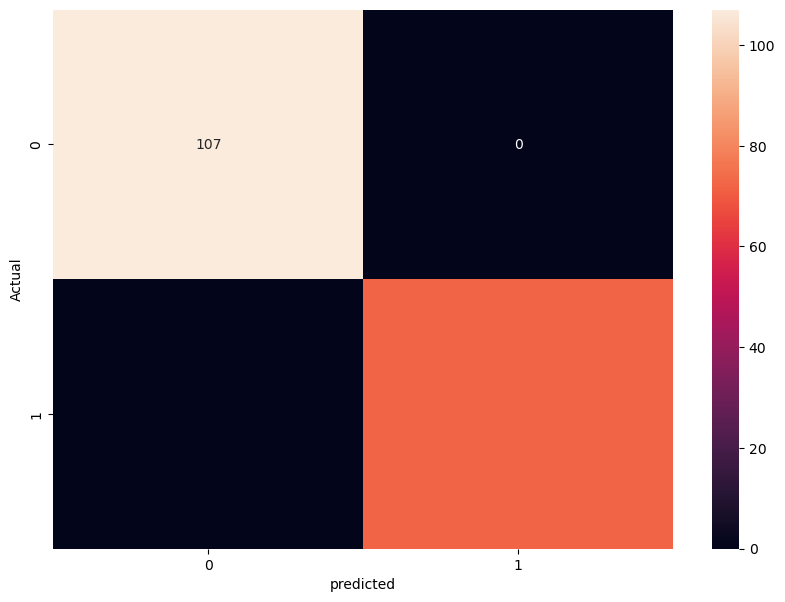

In [12]:
# PLOT THE CONFUSION MATRIX  
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Actual')

In [17]:
# save the model 
import pickle
pickle.dump(model,open('./saved_models/02_model_logistic_regression.pkl','wb'))

In [18]:
import pickle

# Load the saved model
with open('./saved_models/02_model_logistic_regression.pkl', 'rb') as file:
    loaded_model = pickle.load(file)